In [1]:
import pandas as pd
import numpy as np
#import sys
#sys.path.append("../ram_code/")
import Auto_Timeseries_Final as AT

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


Imported Auto_Timeseries version: 0.0.10. Call by using Auto_Timeseries(trainfile, ts_column,
                            sep=',', target=None, score_type='rmse', forecast_period=2,
                            timeinterval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None,
                            verbose=0)
    To get detailed charts of actuals and forecasts, set verbose = 1


In [2]:
datapath = 'C:/Users/Ram/Documents/Ram/data_sets/'
#datapath = ''
filename1 = 'AEP_hourly.csv'
#filename2 = 'test.csv'

In [3]:
train = pd.read_csv(datapath+filename1,index_col=None)
print(train.shape)
train.head(1)

(121273, 2)


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0


In [4]:
#dft = dft.iloc[::48,]
dft = train[:1000]
print(dft.shape)
dft.head(1)

(1000, 2)


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0


In [5]:
ts_column = 'Datetime'
sep = ','
target = 'AEP_MW'
dft[[ts_column,target]].isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [6]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Hourly'
non_seasonal_pdq = (3,1,3)
seasonality = True
seasonal_periods = 24

Dataframe given as input. Analyzing Time Series data...
    Target variable = AEP_MW
Time Interval is given as Hourly

Running PyFlux Model...
Data Set split into train (995, 2) and test (5, 2) for Cross Validation Purposes
Cycling through various (p,d,q) parameters
................................
Best Params Selected (based on rmse): (3, 1, 3)


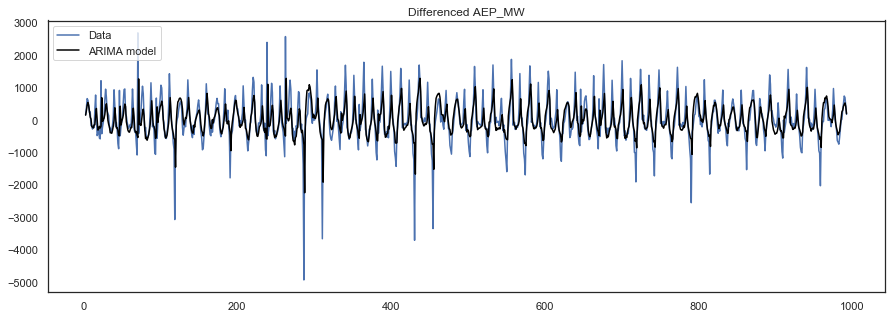

Normal ARIMA(3,1,3)                                                                                       
======================================================= ==================================================
Dependent Variable: Differenced AEP_MW                  Method: MLE                                       
Start Date: 3                                           Log Likelihood: -7576.6463                        
End Date: 994                                           AIC: 15169.2927                                   
Number of observations: 991                             BIC: 15208.4824                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 -0.3962    1.2011     -0.3299  0.7415   (-2.7504 | 1.9579)       
AR(1)                                

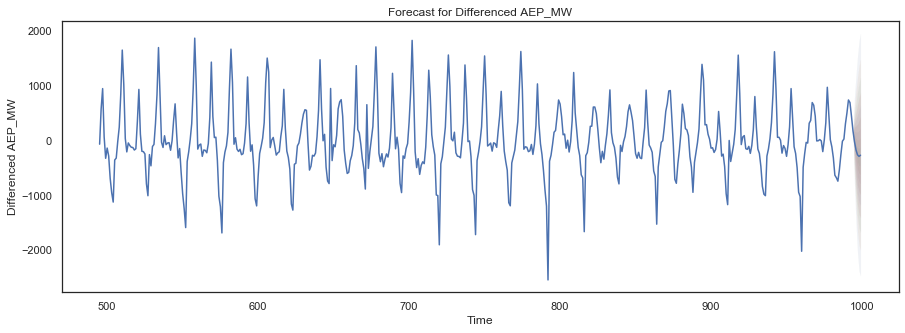

Dynamic 5-period Forecasts:
> c:\users\ram\documents\auto_timeseries\auto_timeseries_final.py(904)build_pyflux_model()
-> if bestpdq[1] == 1:
(Pdb) bestpdq
(3, 1, 3)
(Pdb) c
    RMSE = 329.98
    Std Deviation of Originals = 2,111.70
    Normalized RMSE = 16%

Running Non Seasonal ARIMA Model...
Data Set split into train (995,) and test (5,) for Cross Validation Purposes

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 2, MA order q = 0, Interim metric = 15290.390

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 2, MA order q = 2, Interim metric = 15327.121

Best model is: Non Seasonal ARIMA(2,0,0), aic = 15290.390
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic 5-period Forecasts:


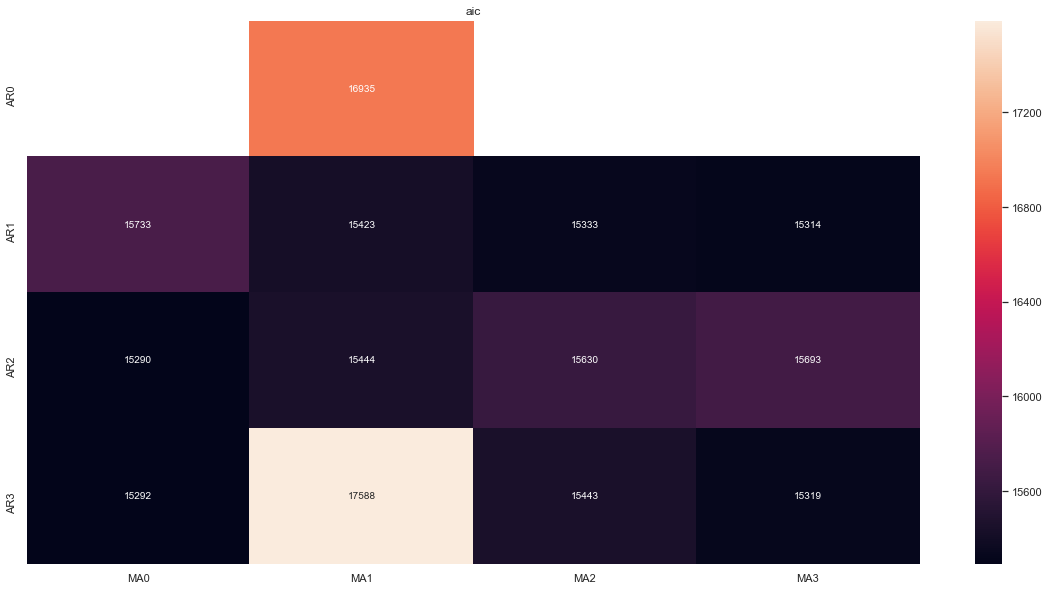

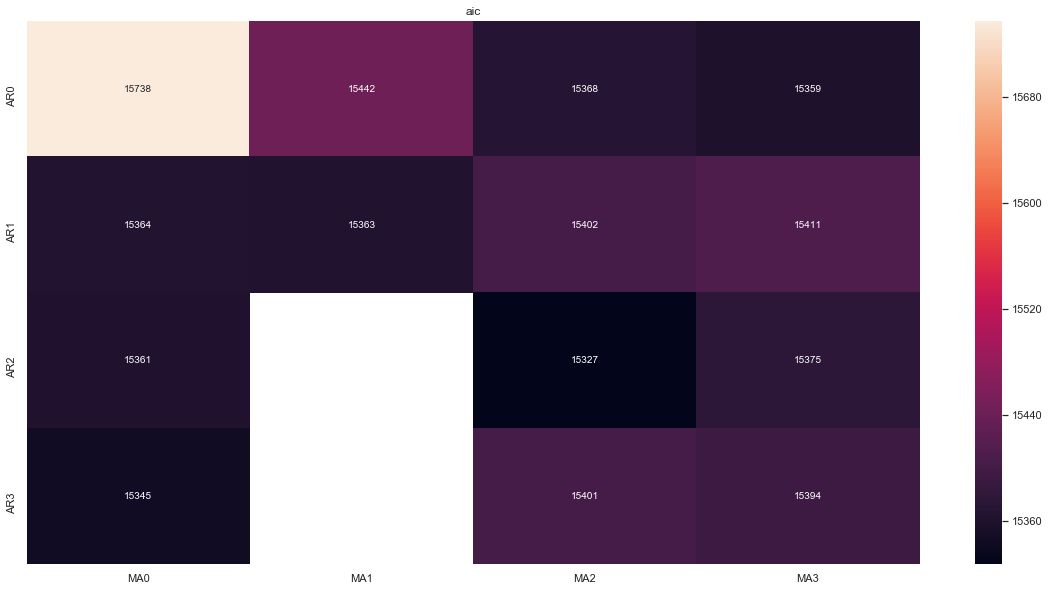

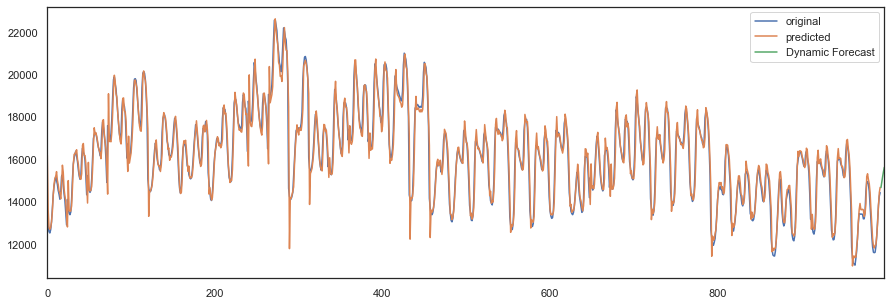

    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Data Set split into train (995,) and test (5,) for Cross Validation Purposes
Building a Seasonal Model...

    Finding best Non-Seasonal pdq Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 3, MA order q = 0, Interim metric = 15218.533

Differencing = 1
    D = 1 results in an empty ARMA set. Setting Seasonality to False since model might overfit

    Finding best Seasonal PDQ Model Parameters:

Differencing = 0
    D = 0 results in an empty ARMA set. Setting Seasonality to False since model might overfit

Differencing = 1
    Iteration 0 completed...
    Best AR order p = 2, MA order q = 3, Interim metric = 15156.785

Best model is a Seasonal SARIMAX(3,0,0)*(2,1,3,12), aic = 15156.785
Fitting best SARIMAX model for full data set
    Best aic metric = 14392.8
Static Forecasts:
    RMSE = 718.19
    Std Deviation of Actuals = 2110.63
    Normalized RMSE = 34.0%


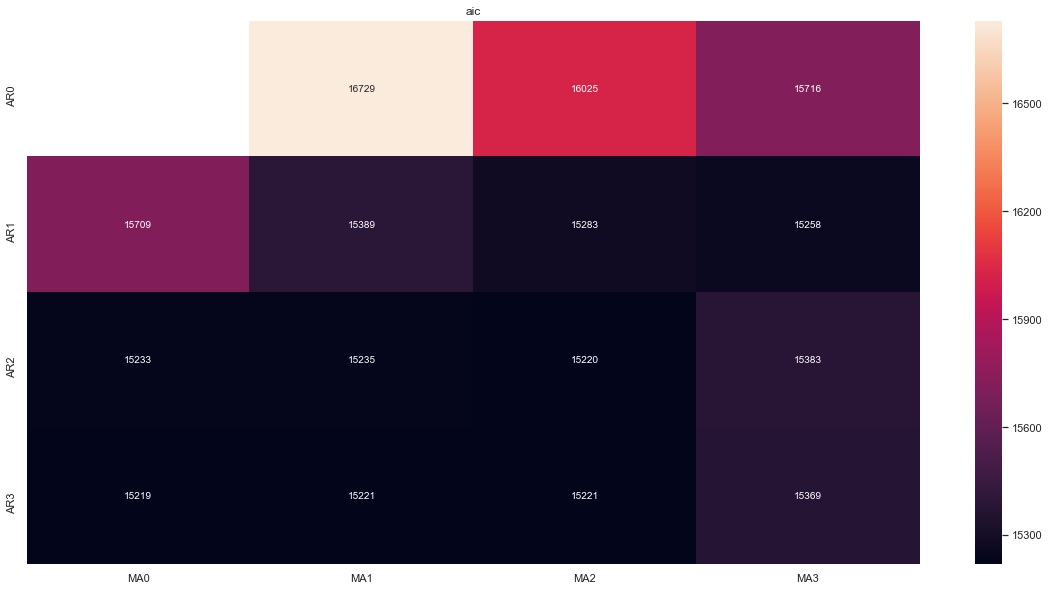

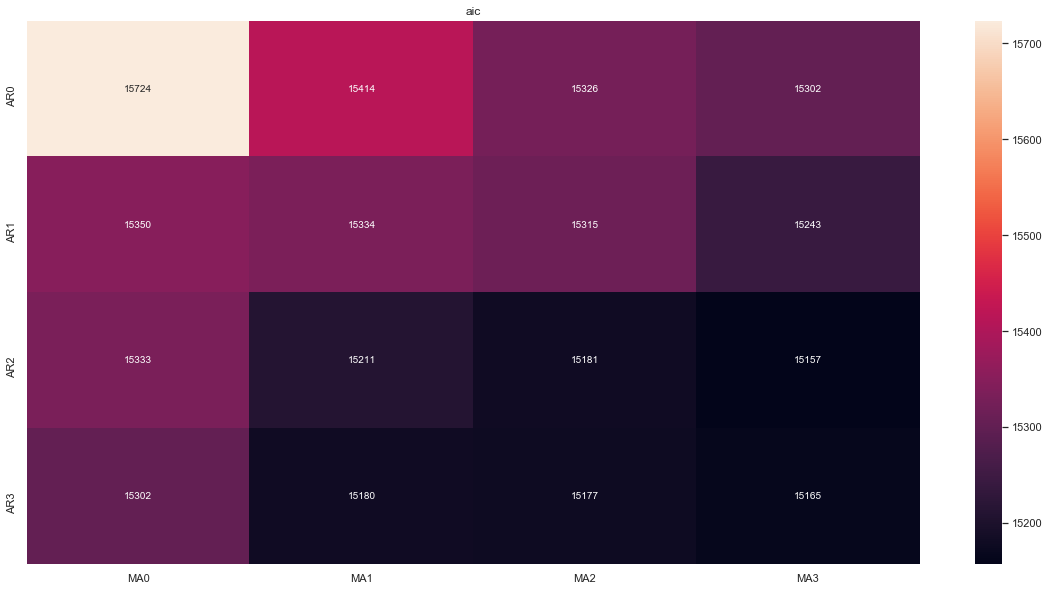

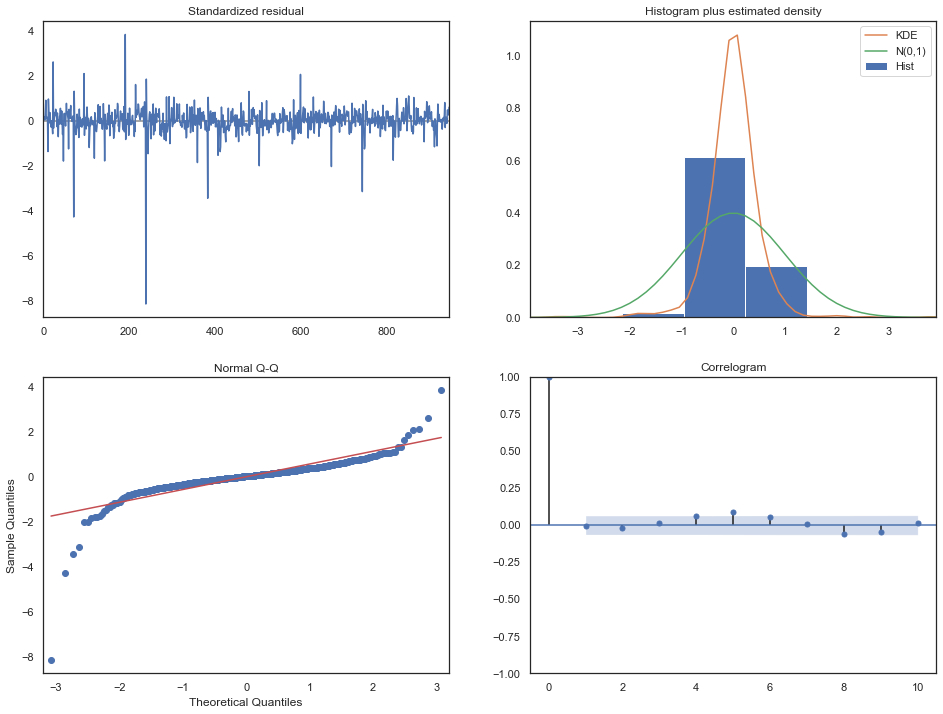

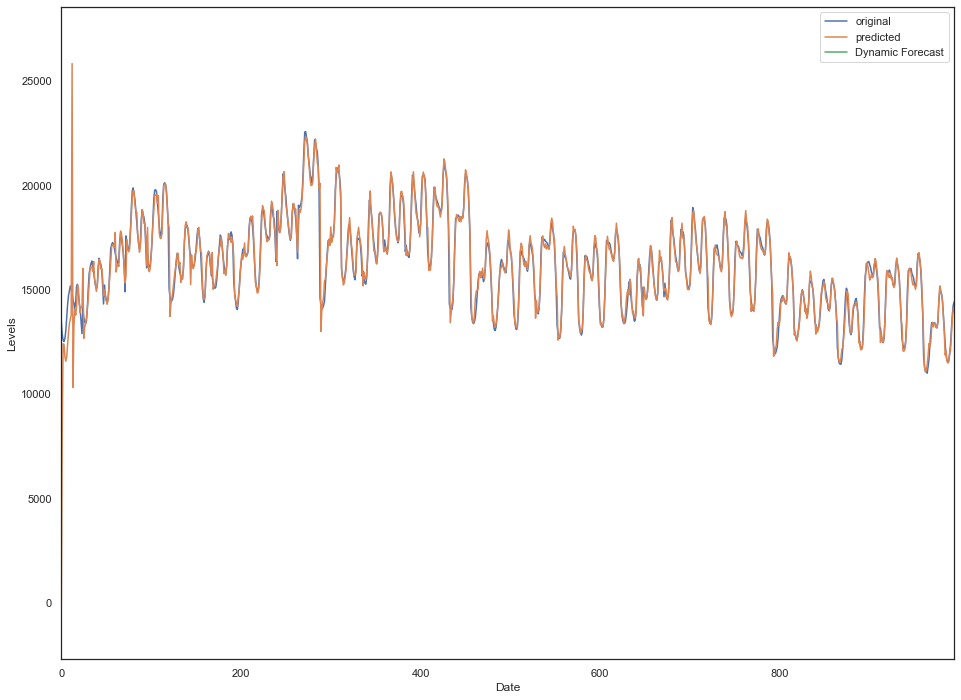

                                 Statespace Model Results                                 
Dep. Variable:                             AEP_MW   No. Observations:                  995
Model:             SARIMAX(3, 0, 0)x(2, 1, 3, 12)   Log Likelihood               -7185.397
Date:                            Sun, 26 Jan 2020   AIC                          14392.793
Time:                                    20:46:01   BIC                          14446.168
Sample:                                         0   HQIC                         14413.134
                                            - 995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     14.4013     19.791      0.728      0.467     -24.388      53.191
drift         -0.0308      0.037   

In [7]:
mldict = AT.Auto_Timeseries(dft, ts_column,
                            sep, target, score_type, forecast_period,
                            timeinterval, non_seasonal_pdq, seasonality=seasonality,
                            seasonal_period=seasonal_periods, seasonal_PDQ=None, conf_int=0.95, 
                            model_type="stats", 
                            verbose=1)